# Shortest paths

This notebook illustrates the search for [shortest paths](https://en.wikipedia.org/wiki/Shortest_path_problem) in graphs.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import miserables, painters, movie_actor
from sknetwork.path import shortest_path
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils import bipartite2undirected

## Graphs

In [4]:
graph = miserables(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [5]:
napoleon = 1
jondrette = 46

In [6]:
path = shortest_path(adjacency, sources=napoleon, targets=jondrette)

In [7]:
edge_labels = [(path[k], path[k + 1], 0) for k in range(len(path) - 1)]

In [10]:
image = svg_graph(adjacency, position, names, edge_labels=edge_labels, edge_width=3, display_edge_weight=False, scale = 1.5)

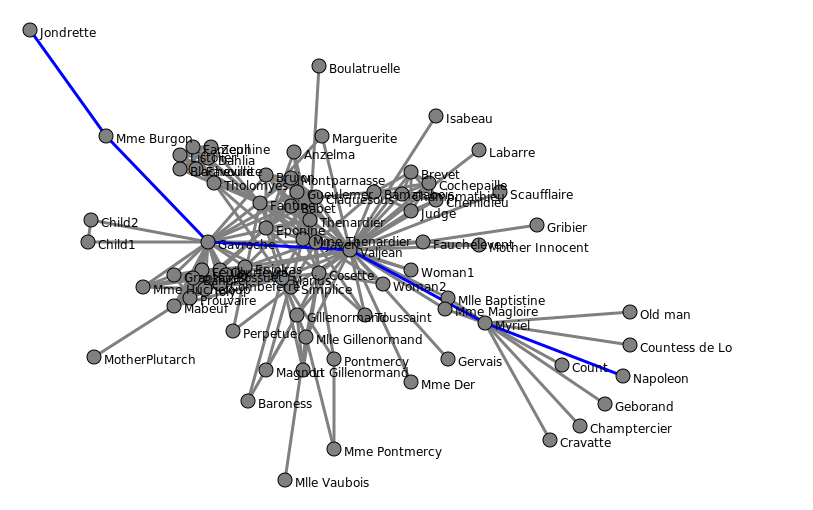

In [11]:
SVG(image)

## Digraphs

In [12]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [13]:
klimt = 6
vinci = 9

In [14]:
path = shortest_path(adjacency, sources=klimt, targets=vinci)

In [15]:
edge_labels = [(path[k], path[k + 1], 0) for k in range(len(path) - 1)]

In [16]:
image = svg_digraph(adjacency, position, names, edge_labels=edge_labels, edge_width=2)

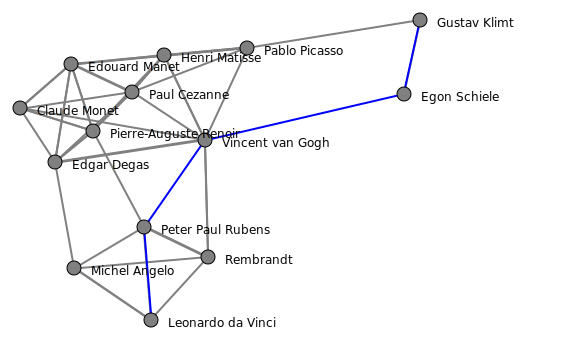

In [17]:
SVG(image)

## Bigraphs

In [44]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [45]:
adjacency = bipartite2undirected(biadjacency)

In [46]:
n_row, _ = biadjacency.shape

In [71]:
seydoux = 9
lewitt = 2

In [72]:
path = shortest_path(adjacency, sources=seydoux + n_row, targets=lewitt + n_row)

In [73]:
edge_labels = []
labels_row = {}
labels_col = {}
for k in range(len(path) - 1):
    i = path[k]
    j = path[k + 1]
    # row first
    if i > j:
        i, j = j, i
    j -= n_row
    labels_row[i] = 0
    labels_col[j] = 0
    edge_labels.append((i, j, 0))

In [74]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col, 
                    edge_labels=edge_labels, edge_color='gray', edge_width=3)

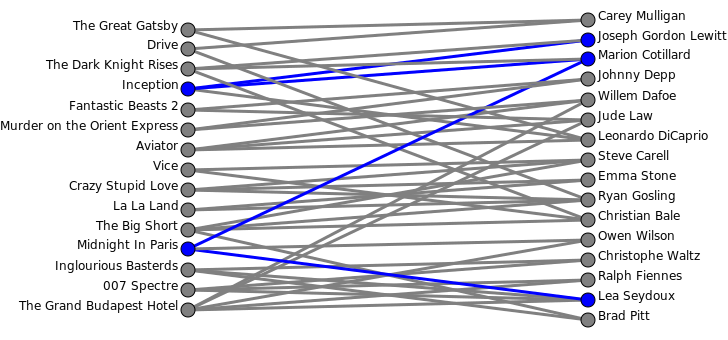

In [75]:
SVG(image)